## Importância das features

## Métodos:
1. Recursive feature elimination
2. Correlação
3. Seleção baseada em clustering

In [2]:
#importando os modulos
import sys
sys.path.append('euthyroid_sick_syndrome')
from utils import *
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV


In [3]:
#Carregando o dataset
dataset = pd.read_csv('euthyroid_sick_syndrome/datasets/euthyroid/euthyroid_final_features.csv')
output_label_dataset = dataset['classification']
dataset = dataset.drop(['classification'], axis=1)

#Balanceando dos dados 
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)

#Dividindo o dataset em treino e teste
#80 % para treino e 20% para teste
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)

## RFE Recursive feature elimination

importância das features: 
 [8.39406045e-02 5.36059623e-03 2.52632455e-02 8.55736057e-04
 1.72539379e-04 1.71194128e-03 9.90213606e-03 6.73686272e-03
 3.41089031e-04 7.76788252e-04 2.34470401e-04 4.89933325e-07
 1.06695157e-03 9.44685238e-02 5.34023453e-01 7.24073011e-02
 9.46815257e-02 6.80557459e-02]
Coluna: 0, Selecionado True, Rank: 1.000
Coluna: 1, Selecionado False, Rank: 6.000
Coluna: 2, Selecionado False, Rank: 3.000
Coluna: 3, Selecionado False, Rank: 8.000
Coluna: 4, Selecionado False, Rank: 13.000
Coluna: 5, Selecionado False, Rank: 9.000
Coluna: 6, Selecionado False, Rank: 4.000
Coluna: 7, Selecionado False, Rank: 5.000
Coluna: 8, Selecionado False, Rank: 11.000
Coluna: 9, Selecionado False, Rank: 10.000
Coluna: 10, Selecionado False, Rank: 12.000
Coluna: 11, Selecionado False, Rank: 14.000
Coluna: 12, Selecionado False, Rank: 7.000
Coluna: 13, Selecionado True, Rank: 1.000
Coluna: 14, Selecionado True, Rank: 1.000
Coluna: 15, Selecionado False, Rank: 2.000
Coluna: 16, Sele

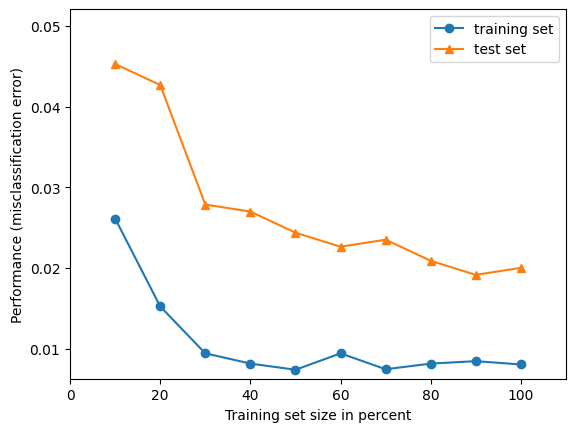

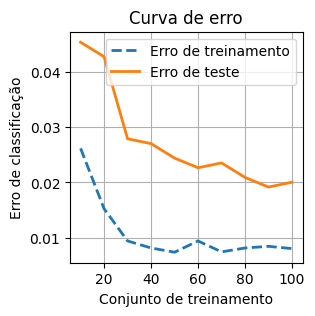

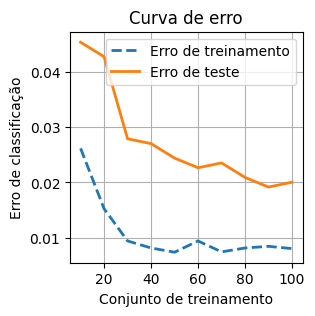

In [20]:
#Selecionando features Usando RFE (Recursive feature elimination)

model = RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=26,
max_features='sqrt', min_samples_split=40, n_estimators=100)
model.fit(input_train, output_train)
'''
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'max_depth': np.arange(10, 30, 5),
        'n_estimators': [10, 30, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

model = GridSearchCV(estimator = model, param_grid = param_grid)
model.fit(input_train, output_train)
print(model.best_params_)
'''

print("importância das features: \n", model.feature_importances_)

# Definir o RFE com 3 recursos a serem selecionados, ou seja ele está selecionando as 3 melhores features
rfe = RFE(estimator=model, n_features_to_select = 5)

# Executar o RFE no conjunto de treinamento
rfe.fit(input_train, output_train)

# Verificando os recursos selecionados
for i in range(input_train.shape[1]):
 print('Coluna: %d, Selecionado %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

#mostrando as features selecionadas
print(dataset.columns[rfe.support_])

# Selecionar os recursos do conjunto de treinamento e teste
input_train_rfe = rfe.transform(input_train)
X_test_rfe = rfe.transform(input_test)

# Criando um novo modelo com os recursos selecionados
model.fit(input_train_rfe, output_train)

# Avaliando a acuracia do modelo no conjunto de teste

y_pred = model.predict(X_test_rfe)

accuracy(output_test, y_pred)
miss_classification(input_train, output_train, input_test, output_test, model)

Este método remove recursivamente as features menos importantes de um conjunto completo de features até que o desempenho do modelo pare de melhorar. Ele usa um modelo de aprendizado de máquina para avaliar o desempenho do modelo após a remoção de cada feature.
Neste método foi usado o Random Forest para selecionar as features mais importantes. Ele treina várias árvores aleatorias com todas as features disponíveis e, em seguida, usa a importância relativa das features para selecionar as mais importantes.


## Resultados

### Com ajuste

5 features ['age', 'TSH', 'T3', 'T4U', 'FTI']

8 features ['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U',
'FTI']

10 features ['age', 'sex', 'on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid',
'TSH', 'T3', 'TT4', 'T4U', 'FTI']

12 features ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'query_hypothyroid',
'query_hyperthyroid', 'goitre', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

---

### Sem ajuste

5 features ['age', 'TSH', 'T3', 'TT4', 'T4U']

8 features ['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U',
'FTI']

10 features ['age', 'sex', 'on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid',
'TSH', 'T3', 'TT4', 'T4U', 'FTI']

12 features ['age', 'sex', 'on_thyroxine', 'thyroid_surgery', 'query_hypothyroid',
'query_hyperthyroid', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


## Correlação

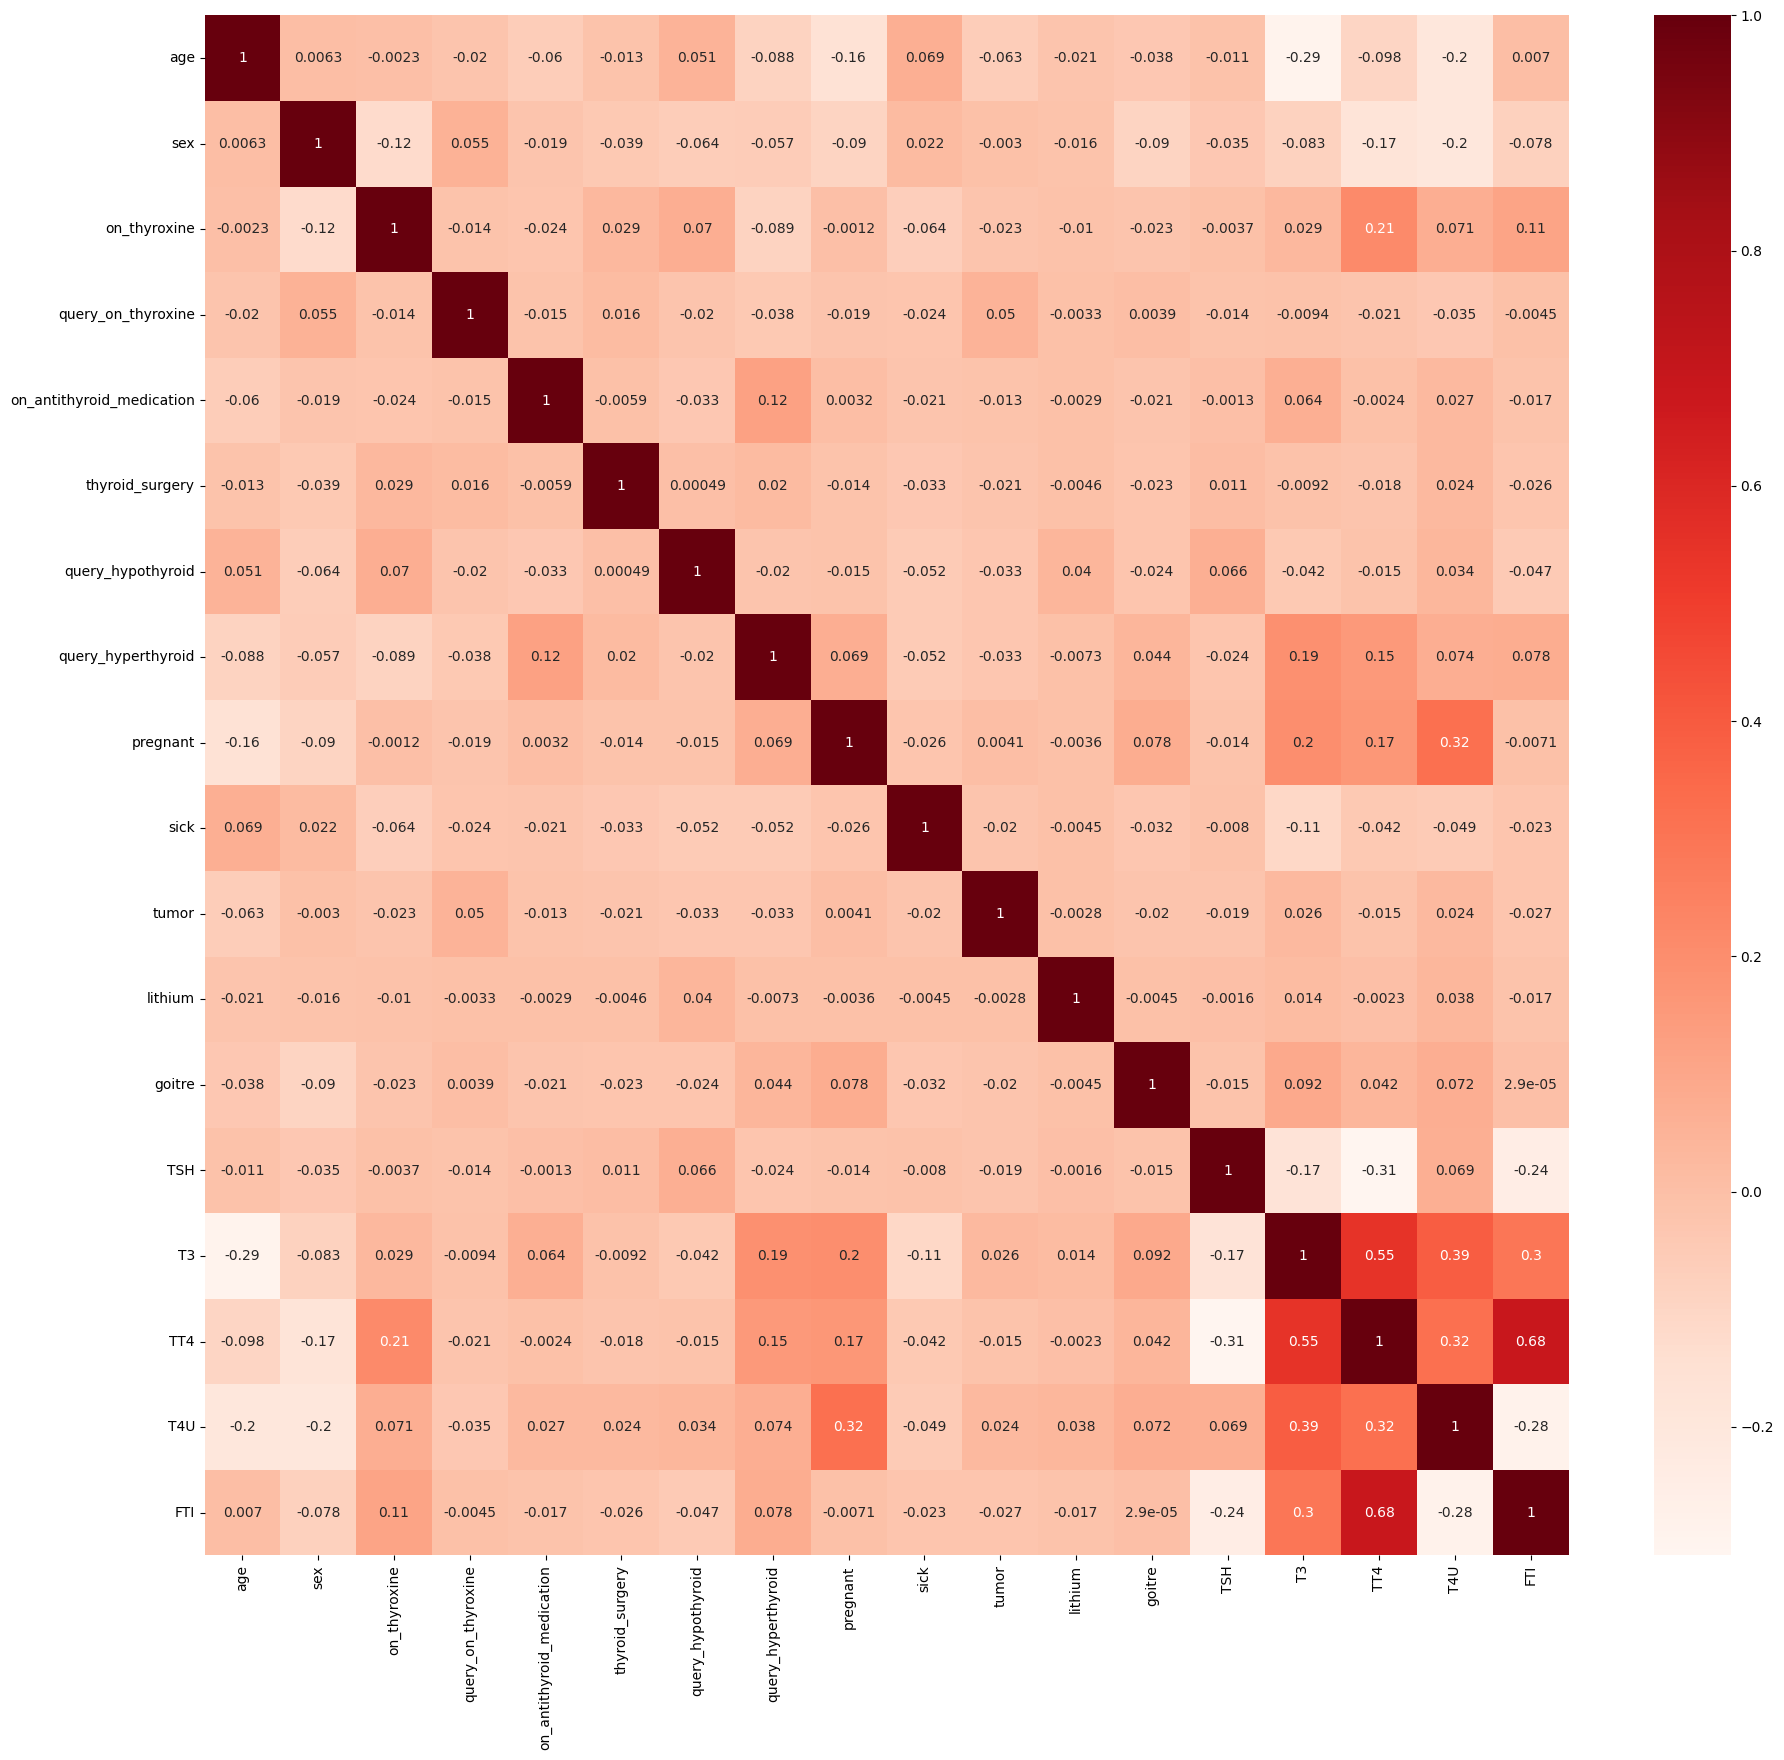

In [4]:
plt.figure(figsize=(22,20))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Este método seleciona as features que têm alta correlação com a variável de saída. Ele usa uma matriz de correlação para identificar as features mais importantes.

## Seleção baseada em clustering

In [7]:
# Criando clusters usando KMeans
kmeans = KMeans(n_clusters = 12, random_state = 42)
kmeans.fit(input_train)

# Selecionando recursos importantes usando LassoCV
# Selecionando 8 features com o parametro max_features=8
lasso = LassoCV(cv=5)
selection = SelectFromModel(estimator=lasso, threshold=-np.inf, max_features = 8)
selection.fit(input_train, kmeans.labels_)
selected_features = selection.get_support(indices=True)

# Imprimindo os recursos selecionados
print("Recursos selecionados: ", dataset.columns[selected_features])

/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recursos selecionados:  Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
       'query_hyperthyroid', 'pregnant', 'sick', 'goitre'],
      dtype='object')


Este método agrupa as features em clusters e seleciona as features mais importantes de cada cluster. Ele usa algoritmos de clustering para agrupar as features.

## Resultados


3 clusters ['age', 'on_thyroxine', 'query_hyperthyroid', 'goitre', 'T3', 'TT4',
'T4U', 'FTI']

5 clusters ['age', 'on_thyroxine', 'on_antithyroid_medication', 'tumor', 'goitre',
'T3', 'TT4', 'T4U']

8 clusters ['age', 'on_thyroxine', 'query_on_thyroxine', 'sick', 'T3', 'TT4', 'T4U',
'FTI']

10 clusters ['age', 'sex', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick',
'tumor', 'T3', 'T4U']

12 clusters ['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
'query_hyperthyroid', 'pregnant', 'sick', 'goitre']